In [2]:
! pip install WordCloud

In [4]:
! pip install tweepy

In [6]:
! pip install TextBlob

In [ ]:
# Tweepy: This library allows Python to access the Twitter platform/database using its API. 
# (To get the API access you will need a twitter developer account please follow the link and instructions to create one).

# TextBlob: It is a Python library for processing textual data.
# It helps in diving into common natural language processing (NLP) tasks such as part-of-speech tagging, 
# noun phrase extraction, sentiment analysis, 
# classification, translation, and more.

# First install the libraries in the Anaconda prompt:
# pip install tweepy
#pip install textbol

In [6]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud #
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
sentiment_neg = TextBlob('I hate you')
print(sentiment_neg)
print(sentiment_neg.sentiment)
sentiment_pos = TextBlob('I Love you')
print(sentiment_pos)
print(sentiment_pos.sentiment)


I hate you
Sentiment(polarity=-0.8, subjectivity=0.9)
I Love you
Sentiment(polarity=0.5, subjectivity=0.6)


In [8]:
class TwitterClient(object):
	'''
	Generic Twitter Class for sentiment analysis.
	'''
	def __init__(self):
		'''
		Class constructor or initialization method.
		'''
		# keys and tokens from the Twitter Dev Console
        # 1. We need to declare the variables to store the various keys associated with the Twitter API.
		consumer_key = 'xCwpeX4FrRMkyG6j4kZkmLu2p'
		consumer_secret = 'AqVcZtLRgjdaOXz27dd2jxs6gGDQR2Ld9qKydUbJmlysuUUsJ3'
		access_token = '751493088-1TIBFuCXgIvKKWadgwomZU7w2qE32mRWgWgjctpw'
		access_token_secret = 'mEMBEOeSCMPgI6USjjy5aBDdnd5YtuWvXQ3Djag1qmWlf'
		try:
			# create OAuthHandler object
			self.auth = OAuthHandler(consumer_key, consumer_secret)
            # 5. On this auth instance, we will call a function set_access_token by passing the access_token and access_token_secret.
			# set access token and secret
			self.auth.set_access_token(access_token, access_token_secret)
			# 6.Finally, we create our tweepy API instance by passing this auth instance into the API function of tweepy.
			self.api = tweepy.API(self.auth)
		except:
			print("Error: Authentication Failed")

	def clean_tweet(self, tweet):
		'''
		Utility function to clean tweet text by removing links, special characters
		using simple regex statements.
		'''
        # re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
        # text = re.sub('#', '', text) # Removing '#' hash tag
        # text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

	def get_tweet_sentiment(self, tweet):
		'''
		Utility function to classify sentiment of passed tweet
		using textblob's sentiment method
		'''
		# create TextBlob object of passed tweet text
		analysis = TextBlob(self.clean_tweet(tweet))
		# set sentiment
		if analysis.sentiment.polarity > 0:
			return 'positive'
		elif analysis.sentiment.polarity == 0:
			return 'neutral'
		else:
			return 'negative'

	def get_tweets(self, query, count = 10):
		'''
		Main function to fetch tweets and parse them.
		'''
		# empty list to store parsed tweets
		tweets = []

		try:
			# call twitter api to fetch tweets
			fetched_tweets = self.api.search(q = query, count = count)

			# parsing tweets one by one
			for tweet in fetched_tweets:
				# empty dictionary to store required params of a tweet
				parsed_tweet = {}

				# saving text of tweet
				parsed_tweet['text'] = tweet.text
				# saving sentiment of tweet
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

				# appending parsed tweet to tweets list
				if tweet.retweet_count > 0:
					# if tweet has retweets, ensure that it is appended only once
					if parsed_tweet not in tweets:
						tweets.append(parsed_tweett)
				else:
					tweets.append(parsed_tweet)

			# return parsed tweets
			return tweets

		except tweepy.TweepError as e:
			# print error (if any)
			print("Error : " + str(e))

def main():
	# creating object of TwitterClient Class
	api = TwitterClient()
	# calling function to get tweets
	tweets = api.get_tweets(query = 'Computer vision', count = 100000)

	# picking positive tweets from tweets
	ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
	print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
	# picking negative tweets from tweets
	ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
	# percentage of negative tweets
	print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
	# percentage of neutral tweets
	#print("Neutral tweets percentage: {} % ".format(100*len(tweets - ntweets - ptweets)/len(tweets)))

	# printing first 5 positive tweets
	print("\n\nPositive tweets:")
	for tweet in ptweets[:1000]:
		print(tweet['text'])

	# printing first 5 negative tweets
	print("\n\nNegative tweets:")
	for tweet in ntweets[:1000]:
		print(tweet['text'])

if __name__ == "__main__":
	# calling main function
	main()


Positive tweets percentage: 30.76923076923077 %
Negative tweets percentage: 30.76923076923077 %


Positive tweets:
RT @WorldCouncilOpt: As students return to schools, more screen time means more eye strain. Raise awareness about eye strain and Computer V…
RT @AmazonScience: The first three online courses cover natural language processing (the machine understanding of human language), computer…
RT @sannykimchi: This is the most well-rounded computer vision course I know (taught by @pjreddie) as it not only teaches you the deep lear…
As students return to schools, more screen time means more eye strain. Raise awareness about eye strain and Compute… https://t.co/fvVkjOg6l4
RT @svpino: On my own, I took the following classes:

- Machine Learning (@AndrewYNg - Coursera)
- Deep Learning (@AndrewYNg - Coursera)
-…
RT @sannykimchi: If you're bored at home or just want to learn something new, check out these 15 amazing reading groups/virtual seminars co…
RT @sheryls_shezza: Hello to all new fol

In [9]:
consumer_key = 'xCwpeX4FrRMkyG6j4kZkmLu2p'
consumer_secret = 'AqVcZtLRgjdaOXz27dd2jxs6gGDQR2Ld9qKydUbJmlysuUUsJ3'
access_token = '751493088-1TIBFuCXgIvKKWadgwomZU7w2qE32mRWgWgjctpw'
access_token_secret = 'mEMBEOeSCMPgI6USjjy5aBDdnd5YtuWvXQ3Djag1qmWlf'
        
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    
# Set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

Show the 5 recent tweets:

1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: https://t.co/2NqFWLr30o

2) RT @trevormundel: This commitment is critical. “Additional manufacturing capacity to begin producing doses for every country, not just the…

3) Teaching special education takes an amazing person to figure out exactly what works for each child. Talking with Washington State Teacher of the Year Amy Campbell gave me an even greater appreciation for these educators: https://t.co/YIxI1eoMkG https://t.co/kOY0tciVAp

4) RT @antonioguterres: Last month, over 1 billion students were affected by #COVID19 school closures.

Even before the pandemic, the world wa…

5) Our foundation is partnering with @DonorsChoose to support teachers as they get ready to go back to school—in whatever form that takes—and 

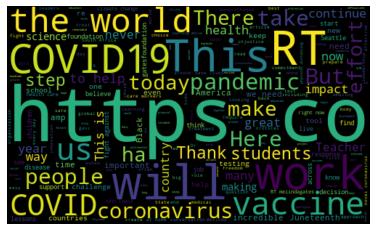

In [5]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1
    
    
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"RT @antonioguterres: Last month, over 1 billio...",0.066667,0.000000
1,Our foundation is partnering with @DonorsChoos...,0.250000,0.100000
2,I always look forward to meeting Washington’s ...,0.707143,0.602381
3,Bill Foege was instrumental in the effort to e...,0.300000,0.000000
4,The world did not do enough to prepare for a p...,0.528472,0.025000
...,...,...,...
95,We’re hopeful that our foundation’s work with ...,0.657778,0.131111
96,It was a magical night. I'm very happy to supp...,0.966667,0.800000
97,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333
98,Science is giving us the opportunity to improv...,0.333333,-0.166667


In [14]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"RT @antonioguterres: Last month, over 1 billio...",0.066667,0.000000,Neutral
1,Our foundation is partnering with @DonorsChoos...,0.250000,0.100000,Positive
2,I always look forward to meeting Washington’s ...,0.707143,0.602381,Positive
3,Bill Foege was instrumental in the effort to e...,0.300000,0.000000,Neutral
4,The world did not do enough to prepare for a p...,0.528472,0.025000,Positive
...,...,...,...,...
95,We’re hopeful that our foundation’s work with ...,0.657778,0.131111,Positive
96,It was a magical night. I'm very happy to supp...,0.966667,0.800000,Positive
97,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333,Positive
98,Science is giving us the opportunity to improv...,0.333333,-0.166667,Negative


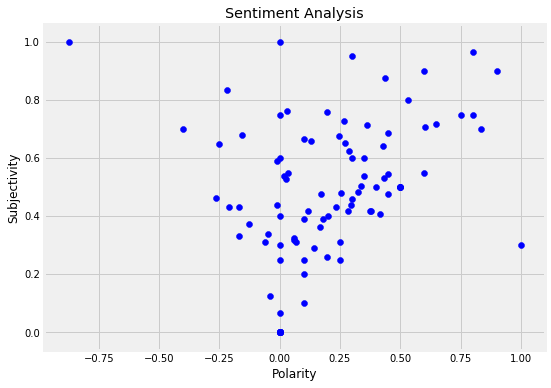

15.0

In [15]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Positive    65
Neutral     20
Negative    15
Name: Analysis, dtype: int64

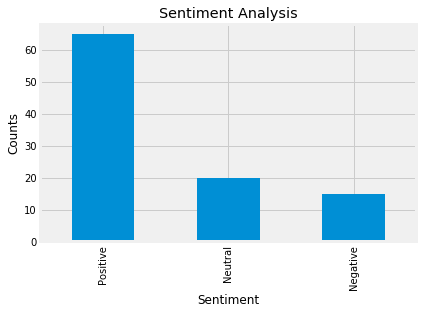

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()